In [1]:
# Import libaries and illustris library
import numpy as np
import illustris_python as il
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
#
# everything in units of h! (h= 0.7)
#

In [8]:
galaxy_data_file = './data/galaxy_data_1.txt'
galaxy_data = np.loadtxt(galaxy_data_file, comments='#')
# 0:HaloNumber, 1:SubhaloNumber, 2:StellarMass, 3:GasMass, 4:DarkMatterMass, 5-7:SubhaloPosition x,y,z
# 8-10:CoM Velocity x, CoM Velocity y, CoM Velocity z, 11-13:AngularMomentum x, AngularMomentum y, AngularMomentum z, 
# 14:Kappa, 15:Flatness, 16:Ellip, 17:Lambda 18: Index of segment/critical point, 19:absolute distance to filament, 
# 20:dot product ang. mom. vec. with filament vec. 21-23: nearest segement coordinates 24: Index of nearest critical point, 
# 25: absolute distance to crit., 26-28: nearest critical point coordinates

In [109]:
# Cut-off function
# input: data array, cutoff_index: index of data to be used for cutoff, cutoff: value, bigger: bool > or <
def cut_off(data, cutoff_index, cutoff, bigger):
    #create mask to constrain kappa
    if(bigger == 1):
        data_mask = data[(data[:,cutoff_index] > cutoff)]
    elif(bigger == -1):
        data_mask = data[(data[:,cutoff_index] < cutoff)]
    else:
        print("input error cut_off function")
        return
    return data_mask

In [99]:
#Binning
#input: data matrix, index1-2: indices of data to be binned (binned w/ repsect to index 1), no of bins
#output: 4 columns: binned data from index 1&2, error from index 1&2
def bin_data(bin_data, index1, index2, bins, bmedian):
    
    data_pts = bins;
    data_steps = 1./bins;
    data = bin_data[:, [index1, index2]]

    binned_mat = np.zeros((data_pts, 4))
    amax = np.amax(data[:,0])
    
    for i in range (0, data_pts):
         
        mask_i = (((data[:,0]) > (i*data_steps*amax)) & ((data[:,0]) < (data_steps*(i+1)*amax) ))
        
        data_mask_i = data[mask_i]
        
        if (bmedian == 1):
            binned_mat[i,0] = np.median(data_mask_i[:,0])
            binned_mat[i,1] = np.median(data_mask_i[:,1])
            binned_mat[i,2] = (np.std(data_mask_i[:,0]))/(np.sqrt(np.count_nonzero(data_mask_i[:,0])))
            binned_mat[i,3] = (np.std(data_mask_i[:,1]))/(np.sqrt(np.count_nonzero(data_mask_i[:,1])))
        else:
            binned_mat[i,0] = np.mean(data_mask_i[:,0])
            binned_mat[i,1] = np.mean(data_mask_i[:,1])
            binned_mat[i,2] = (np.std(data_mask_i[:,0]))/(np.sqrt(np.count_nonzero(data_mask_i[:,0])))
            binned_mat[i,3] = (np.std(data_mask_i[:,1]))/(np.sqrt(np.count_nonzero(data_mask_i[:,1])))
        
    return binned_mat

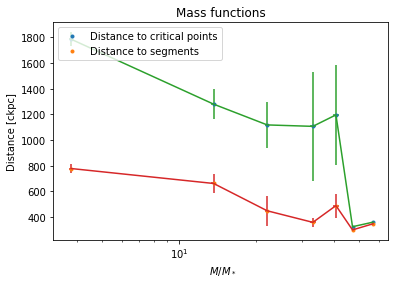

In [131]:
binned_data_mass_crit = bin_data(galaxy_data, 2, 25, 7,1)
binned_data_mass_seg = bin_data(galaxy_data, 2, 19, 7,1)

x = binned_data_mass_crit[:,0]
y = binned_data_mass_crit[:,1]

x1 = binned_data_mass_seg[:,0]
y1 = binned_data_mass_seg[:,1]

plt.plot( x, y,'.');
plt.plot( x1, y1,'.');
plt.xscale('log')
plt.yscale('linear')

plt.xlabel(' $M /M_*$')
plt.ylabel('Distance [ckpc]')
plt.title('Mass functions')

plt.errorbar(x, y, xerr=binned_data_mass_crit[:,2], yerr=binned_data_mass_crit[:,3] )
plt.errorbar(x1, y1, xerr=binned_data_mass_seg[:,2], yerr=binned_data_mass_seg[:,3] )

plt.legend(['Distance to critical points', 'Distance to segments'], loc='upper left')
plt.show()

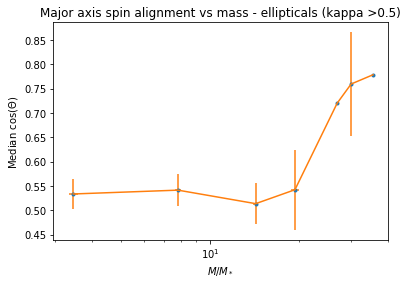

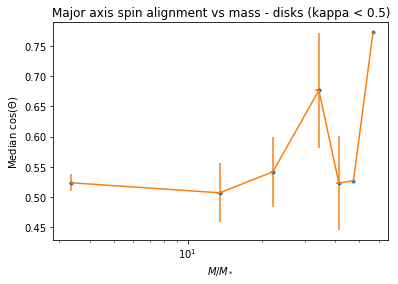

In [115]:
galaxy_data_elip = cut_off(galaxy_data, 14, 0.5, 1)
galaxy_data_disk = cut_off(galaxy_data, 14, 0.5, -1)

binned_data_elip = bin_data(galaxy_data_elip, 2, 20, 7,1)
binned_data_disk = bin_data(galaxy_data_disk, 2, 20, 7,1)

# only have cos(theta) values > 0.5
for i in range(0, binned_data_elip.shape[0]):
    if (binned_data_elip[i,1] < 0.5):
        binned_data_elip[i,1] = 1-binned_data_elip[i,1]
for i in range(0, binned_data_disk.shape[0]):
    if (binned_data_disk[i,1] < 0.5):
        binned_data_disk[i,1] = 1-binned_data_disk[i,1]
        
x = binned_data_elip[:,0]
y = binned_data_elip[:,1]

plt.plot( x, y,'.' );
plt.xscale('log')
plt.yscale('linear')

plt.xlabel('$M /M_*$')
plt.ylabel('Median cos($\Theta$)')
plt.title('Major axis spin alignment vs mass - ellipticals (kappa >0.5)')

plt.errorbar(x, y, xerr=binned_data_elip[:,2], yerr=binned_data_elip[:,3] )
plt.show()

x = binned_data_disk[:,0]
y = binned_data_disk[:,1]

plt.plot( x, y,'.' );
plt.xscale('log')
plt.yscale('linear')

plt.xlabel('$M /M_*$')
plt.ylabel('Median cos($\Theta$)')
plt.title('Major axis spin alignment vs mass - disks (kappa < 0.5)')

plt.errorbar(x, y, xerr=binned_data_disk[:,2], yerr=binned_data_disk[:,3] )
plt.show()


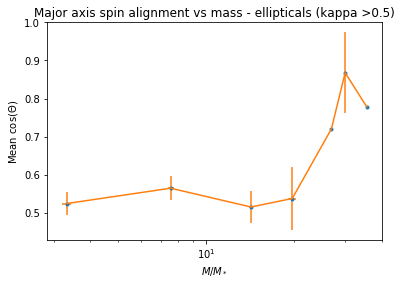

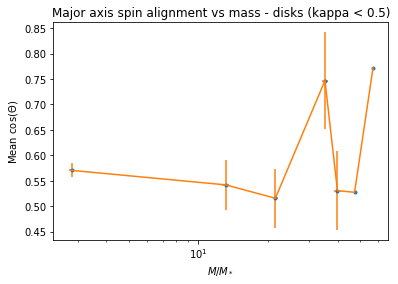

In [116]:
binned_data_elip = bin_data(galaxy_data_elip, 2, 20, 7,0)
binned_data_disk = bin_data(galaxy_data_disk, 2, 20, 7,0)

# only have cos(theta) values > 0.5
for i in range(0, binned_data_elip.shape[0]):
    if (binned_data_elip[i,1] < 0.5):
        binned_data_elip[i,1] = 1-binned_data_elip[i,1]
for i in range(0, binned_data_disk.shape[0]):
    if (binned_data_disk[i,1] < 0.5):
        binned_data_disk[i,1] = 1-binned_data_disk[i,1]
        
x = binned_data_elip[:,0]
y = binned_data_elip[:,1]

plt.plot( x, y,'.' );
plt.xscale('log')
plt.yscale('linear')

plt.xlabel('$M /M_*$')
plt.ylabel('Mean cos($\Theta$)')
plt.title('Major axis spin alignment vs mass - ellipticals (kappa >0.5)')

plt.errorbar(x, y, xerr=binned_data_elip[:,2], yerr=binned_data_elip[:,3] )
plt.show()

x = binned_data_disk[:,0]
y = binned_data_disk[:,1]

plt.plot( x, y,'.' );
plt.xscale('log')
plt.yscale('linear')

plt.xlabel('$M /M_*$')
plt.ylabel('Mean cos($\Theta$)')
plt.title('Major axis spin alignment vs mass - disks (kappa < 0.5)')

plt.errorbar(x, y, xerr=binned_data_disk[:,2], yerr=binned_data_disk[:,3] )
plt.show()
